In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\env\Delinquency_prediction_dataset.csv")
print(df.head())

  Customer_ID  Age    Income  Credit_Score  Credit_Utilization  \
0    CUST0001   56  165580.0         398.0            0.390502   
1    CUST0002   69  100999.0         493.0            0.312444   
2    CUST0003   46  188416.0         500.0            0.359930   
3    CUST0004   32  101672.0         413.0            0.371400   
4    CUST0005   60   38524.0         487.0            0.234716   

   Missed_Payments  Delinquent_Account  Loan_Balance  Debt_to_Income_Ratio  \
0                3                   0       16310.0              0.317396   
1                6                   1       17401.0              0.196093   
2                0                   0       13761.0              0.301655   
3                3                   0       88778.0              0.264794   
4                2                   0       13316.0              0.510583   

  Employment_Status  Account_Tenure Credit_Card_Type     Location Month_1  \
0               EMP              18          Student  Los

In [9]:
print("shape: ", df.shape)
print("data info: ",df.info())
print("summary statstics: ",df.describe())

shape:  (500, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month

In [12]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
missing_table

,Missing Count,Missing %
Income,39,7.8
Loan_Balance,29,5.8
Credit_Score,2,0.4
Age,0,0.0
Customer_ID,0,0.0
Missed_Payments,0,0.0
Credit_Utilization,0,0.0
Delinquent_Account,0,0.0
Debt_to_Income_Ratio,0,0.0
Employment_Status,0,0.0


In [13]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


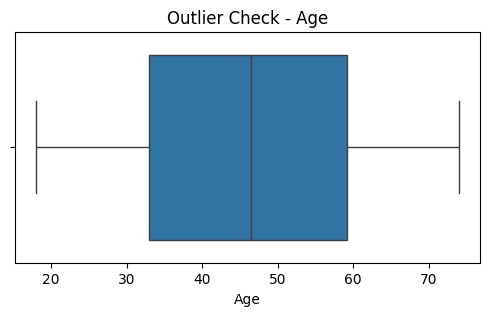

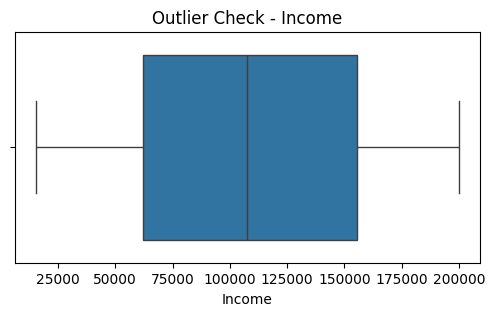

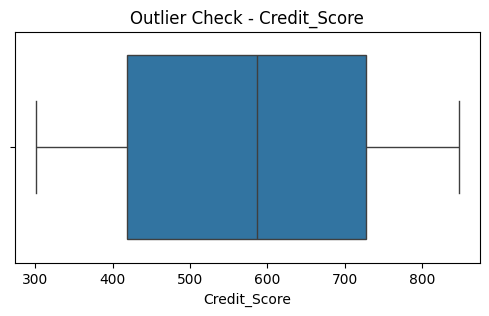

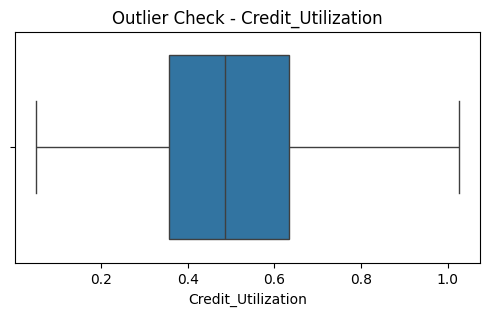

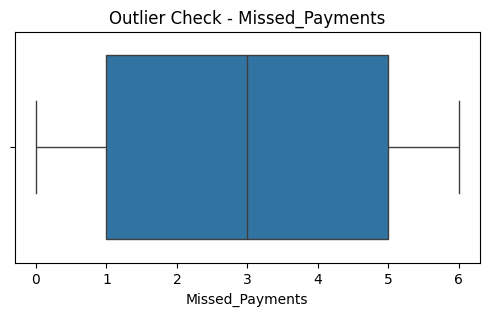

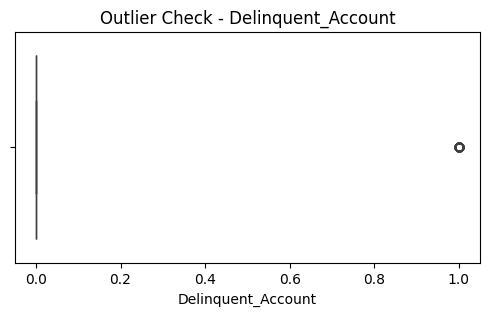

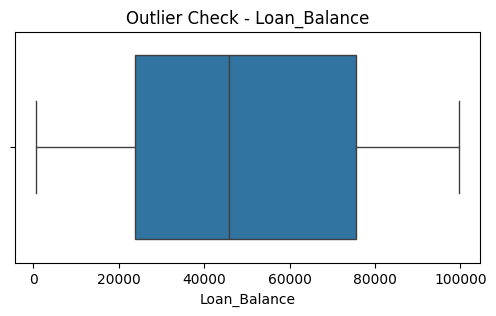

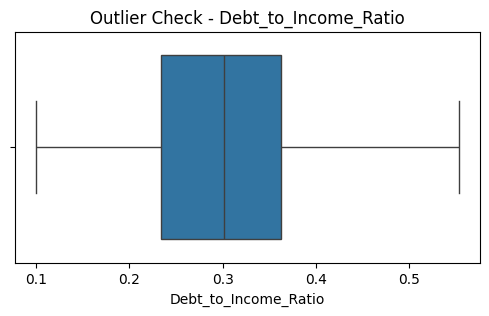

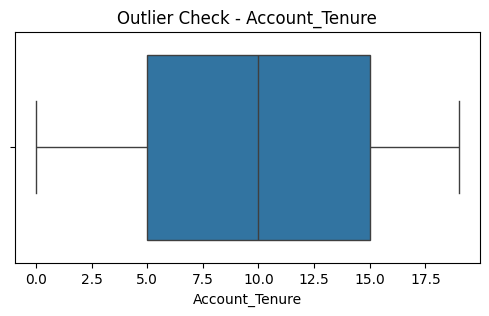

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check - {col}")
    plt.show()

In [25]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])
print("Total missing values after imputation:", df.isnull().sum().sum())


Total missing values after imputation: 0


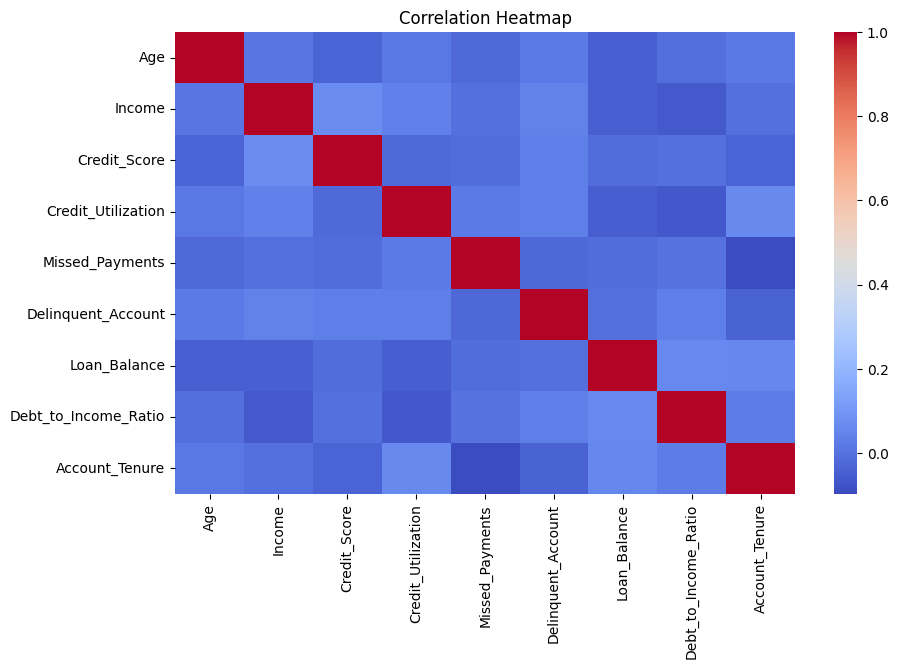

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
cols_to_check = ['credit_utilization', 'income', 'payment_history', 'age', 'account_age', 'prior_delinquency_count']

for col in cols_to_check:
    if col in df.columns:
        plt.figure(figsize=(5,3))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()